In [1]:
import pandas as pd
from statmanager import Stat_Manager
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# langs = ['kor', 'eng']

df = pd.read_csv(r'testdata\testdf.csv', index_col = 'id') 
# df2 = pd.read_csv(r'testdata\testdf2.csv', index_col = 'id') 
sm = Stat_Manager(df, language='kor')



Stat_Manager 객체 생성 완료! (Version 1.8.1.10)

사용법 설명 메소드: .howtouse()
분석 메소드: .progress()
언어 세팅 변경 메소드: .set_language()
데이터프레임 변경 메소드 .change_dataframe()
Note: To change the language, provide 'eng' as an argument to the 'language' parameter when creating the Stat_Manager() object.
Or just run .set_language('eng')

*****
↓↓ 상세한 정보는 공식 문서를 확인하세요! ↓↓
https://cslee145.notion.site/fd776d4f9a4f4c9db2cf1bbe60726971?v=3b2b237555fc4cd3a41a8da337d80c01&pvs=4 
*****



In [2]:
sm.set_language('eng').howtouse()

*****
The Language is set to ENGLISH.
*****

*****
↓↓ Check for the more details in official documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****

Statistical analysis can be applied using .progress(). 

Example. Independent samples t-test to test for differences in age by sex:
sm.progress(method = 'ttest_ind', vars = 'sex', group_vars = 'age').figure()

In .howtouse(), enter the keywords you want to search for the analysis:

Example 1. If you want to know how to apply ANOVA, sm.howtouse("ANOVA")
Example 2. If you want to know how to test normality, sm.howtouse("normality")
Example 3. If you want to know how to test nonparametric, sm.howtouse("Non-parametric")

If you want to know how to filter your data, enter sm.howtouse("selector")! 

The table below summarizes the implementation methods for each statistical analysis method applied to statmanager-kr. 
 Search sm.howtouse("figure") for the function to draw pic

,Purpose,method,vars,group_vars,posthoc
Analysis,,,,,
Kolmogorov-Smirnov Test,Check normality assumption,kstest,Variable to check for normality assumptions (str),Group variable (str) or Omit,NaN
Shapiro-Wilks Test,Check normality assumption,shapiro,Variable to check for normality assumptions (str),Group variable (str) or Omit,NaN
z-skeweness & z-kurtosis test,Check normality assumption,z_normal,Variable to check for normality assumptions (str),Group variable (str) or Omit,NaN
Levene Test,Check homoskedasticity assumption,levene,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
F-max Test,Check homoskedasticity assumption,fmax,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
Chi-Square Test,Cross-tabulation analysis,chi2_contingency,Variables to check for frequency differences (...,NaN,NaN
Fisher's Exact Test,Cross-tabulation analysis,fisher,Variables to check for frequency differences (...,NaN,NaN
Correlation analysis: Pearson r,Correlation analysis - Parametric test,pearsonr,Variables to check correlation (list),NaN,NaN
Correlation analysis: Spearman rho,Correlation analysis - Non-parametric test,spearmanr,Variables to check correlation (list),NaN,NaN


,method,vars,group_vars
Index,,,
Making P-P plot,pp_plot,variable to make P-P plot (str),NaN
Making Q-Q plot,qq_plot,variable to make Q-Q plot (str),NaN
Making histogram,hist,variable to make histogram (str),NaN
Making histogram in cumulative format,hist_cumulative,variables to make histogram (str),NaN
Making pointplot for within group difference,point_within,variables to compare (list),NaN
Making barplot for between group difference,bar_between,variable to compare between groups (str),group variable (str)



The table below describes how selector parameters are utilized to filter data in .progress(). 



,mean,format of selector argument,pandas operator
python operator,,,
if a == b:,Only the data where a is b,{'a' : 'b'},df.loc['a' == 'b']
if a != b:,Only the data where a is NOT b,"{'a' : {'!=', 'b'} }",df.loc['a' != 'b']
if a > b:,Only the data with a > b,"{'a' : {'>', 'b'} }",df.loc['a' > 'b']
if a >= b:,Only the data with a >= b,"{'a' : {'>=', 'b'} }",df.loc['a' >= 'b']
if a < b:,Only the data with a < b,"{'a' : {'<', 'b'} }",df.loc['a' < 'b']
if a <= b:,Only the data with a <= b,"{'a' : {'<=', 'b'} }",df.loc['a' <= 'b']


In [3]:
sns.barplot(data = df, x = 'sex', y = 'age', hue = 'sex', estimator = np.mean, errorbar = 'ci', capsize = 0.1)

<Axes: xlabel='sex', ylabel='age'>

Error in callback <function flush_figures at 0x00000287BCDB0540> (for post_execute):


KeyboardInterrupt: 

Yuen's Two-Sample T-test (Independent samples t-test using unequal variance)
Note: 백분율을 기준으로 상위 및 하위 20.00% 데이터를 자르고 분석이 진행됩니다.

변수 : age
집단변수 : sex
비교집단 : ['female' 'male']
기술통계치: 


,female,male
n,9,9
mean,26.667,26.778
median,26.0,26.0
std,2.0,4.086
min,24,22
max,30,34


,t-value,degree of freedom,p-value,95% CI
dependent variable,,,,
age,-0.045,16.0,0.965,"[-5.360, 5.137]"


<Axes: title={'center': 'Mean differences in age by sex (Trim ratio :20.00%)'}, xlabel='sex', ylabel='age'>

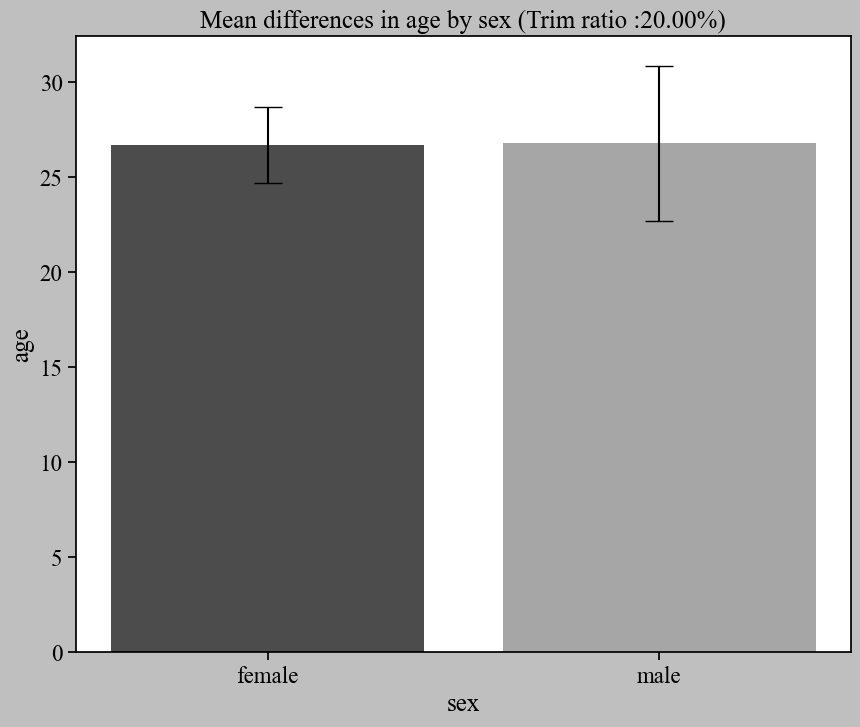

In [ ]:
sm.progress(method = 'ttest_ind_trim0.2', vars = 'age', group_vars = 'sex').figure()

In [ ]:
sm = Stat_Manager(df, language='eng')

Stat_Manager object created successfully! (Version 1.8.1.10)

Method to check how to use: .howtouse()
Method for statistical analysis: .progress()
Method for changing language: .set_language()
Method for changing dataframe .change_dataframe()

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****



In [ ]:
sm.set_language('eng')

*****
The Language is set to ENGLISH.
*****



In [ ]:
sm.howtouse()

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****

In .howtouse(), enter the keywords you want to search for the analysis:

Example 1. If you want to know how to apply ANOVA, sm.howtouse("ANOVA")
Example 2. If you want to know how to test normality, sm.howtouse("normality")
Example 3. If you want to know how to test nonparametric, sm.howtouse("Non-parametric")

If you want to know how to filter your data, enter sm.howtouse("selector")! 

The table below summarizes the implementation methods for each statistical analysis method applied to statmanager-kr. 
 Search sm.howtouse("fgiure") for the function to draw pictures and graphs! 


,Purpose,method,vars,group_vars,posthoc
Analysis,,,,,
Kolmogorov-Smirnov Test,Check normality assumption,kstest,Variable to check for normality assumptions (str),Group variable (str) or Omit,NaN
Shapiro-Wilks Test,Check normality assumption,shapiro,Variable to check for normality assumptions (str),Group variable (str) or Omit,NaN
z-skeweness & z-kurtosis test,Check normality assumption,z_normal,Variable to check for normality assumptions (str),Group variable (str) or Omit,NaN
Levene Test,Check homoskedasticity assumption,levene,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
F-max Test,Check homoskedasticity assumption,fmax,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
Chi-Square Test,Cross-tabulation analysis,chi2_contingency,Variables to check for frequency differences (...,NaN,NaN
Fisher's Exact Test,Cross-tabulation analysis,fisher,Variables to check for frequency differences (...,NaN,NaN
Correlation analysis: Pearson r,Correlation analysis - Parametric test,pearsonr,Variables to check correlation (list),NaN,NaN
Correlation analysis: Spearman rho,Correlation analysis - Non-parametric test,spearmanr,Variables to check correlation (list),NaN,NaN


,method,vars,group_vars
Index,,,
Making P-P plot,pp_plot,variable to make P-P plot (str),NaN
Making Q-Q plot,qq_plot,variable to make Q-Q plot (str),NaN
Making histogram,hist,variable to make histogram (str),NaN
Making histogram in cumulative format,hist_cumulative,variables to make histogram (str),NaN
Making pointplot for within group difference,point_within,variables to compare (list),NaN
Making barplot for between group difference,bar_between,variable to compare between groups (str),group variable (str)



The table below describes how selector parameters are utilized to filter data in .progress(). 



,mean,format of selector argument,pandas operator
python operator,,,
if a == b:,Only the data where a is b,{'a' : 'b'},df.loc['a' == 'b']
if a != b:,Only the data where a is NOT b,"{'a' : {'!=', 'b'} }",df.loc['a' != 'b']
if a > b:,Only the data with a > b,"{'a' : {'>', 'b'} }",df.loc['a' > 'b']
if a >= b:,Only the data with a >= b,"{'a' : {'>=', 'b'} }",df.loc['a' >= 'b']
if a < b:,Only the data with a < b,"{'a' : {'<', 'b'} }",df.loc['a' < 'b']
if a <= b:,Only the data with a <= b,"{'a' : {'<=', 'b'} }",df.loc['a' <= 'b']


In [ ]:
df

,condition,age,sex,location,income,prescore,postscore,fupscore
id,,,,,,,,
1,test_group,33,female,kor,237,7,10,5
2,test_group,26,female,kor,303,8,5,4
3,test_group,28,female,kor,327,2,4,2
4,test_group,25,female,usa,243,8,3,7
5,test_group,21,female,usa,409,2,10,4
6,test_group,39,male,usa,309,4,1,1
7,test_group,22,male,jpn,297,6,7,9
8,test_group,23,male,jpn,249,0,4,3
9,test_group,39,male,jpn,445,3,0,2


In [ ]:
sm.progress(method = 'friedman', vars = ['prescore', 'postscore', 'fupscore'], posthoc = True)

Friedman Test
변수: ['prescore', 'postscore', 'fupscore'], 시점 = 3
변수별 기술통계치: 



,prescore,postscore,fupscore
n,30.000,30.000,30.000
mean,5.133,4.233,4.367
median,5.500,4.000,4.000
std,2.849,2.909,2.619
min,0.000,0.000,1.000
max,10.000,10.000,9.000


,correcting for ties,p-value
variables,,
"['prescore', 'postscore', 'fupscore']",3.911,0.142


Posthoc: 


group1,group2,stat,pval,pval_corr,reject
fupscore,postscore,468.5,0.7886,1.0,False
fupscore,prescore,378.0,0.287,0.861,False
postscore,prescore,365.5,0.2115,0.6344,False


In [ ]:
sm.progress(method = 'kstest', vars = 'age', group_vars = 'sex')

Kolmogorov-Smirnov Test
주의: 적어도 하나 이상의 경우에서 표본 수가 30보다 적습니다. 정규성 가정 충족 여부를 확인하기 위해 다른 분석을 고려하십시오. 


,n,test statistic,p-value,maximum deviation location,deviation direction,conclusion
set,,,,,,
female,15.0,0.145,0.869,26.0,1.0,정규성 가정 충족
male,15.0,0.172,0.704,23.0,1.0,정규성 가정 충족


In [ ]:
df.reset_index().melt(id_vars = 'id', value_vars = ['prescore','postscore','fupscore']).pivot(index = 'id', columns = )

,id,variable,value
0,1,prescore,7
1,2,prescore,8
2,3,prescore,2
3,4,prescore,8
4,5,prescore,2
...,...,...,...
85,26,fupscore,4
86,27,fupscore,2
87,28,fupscore,8
88,29,fupscore,1


In [ ]:
df.columns

Index(['condition', 'age', 'sex', 'location', 'income', 'prescore',
       'postscore', 'fupscore'],
      dtype='object')

One-way Repeated Measures ANOVA
변수: ['prescore', 'postscore', 'fupscore'], 시점 = 3
변수별 기술통계치: 



,prescore,postscore,fupscore
n,30.000,30.000,30.000
mean,5.133,4.233,4.367
median,5.500,4.000,4.000
std,2.849,2.909,2.619
min,0.000,0.000,1.000
max,10.000,10.000,9.000


,F Value,Num DF,Den DF,p-value,partial eta squared
variable,1.079,2.0,58.0,0.347,0.02


Posthoc: 


group1,group2,stat,pval,pval_corr,reject
fupscore,postscore,0.1866,0.8526,1.0,False
fupscore,prescore,-1.0849,0.2824,0.8473,False
postscore,prescore,-1.2106,0.231,0.6929,False


<Axes: title={'center': 'Mean difference between prescore, postscore, fupscore'}>

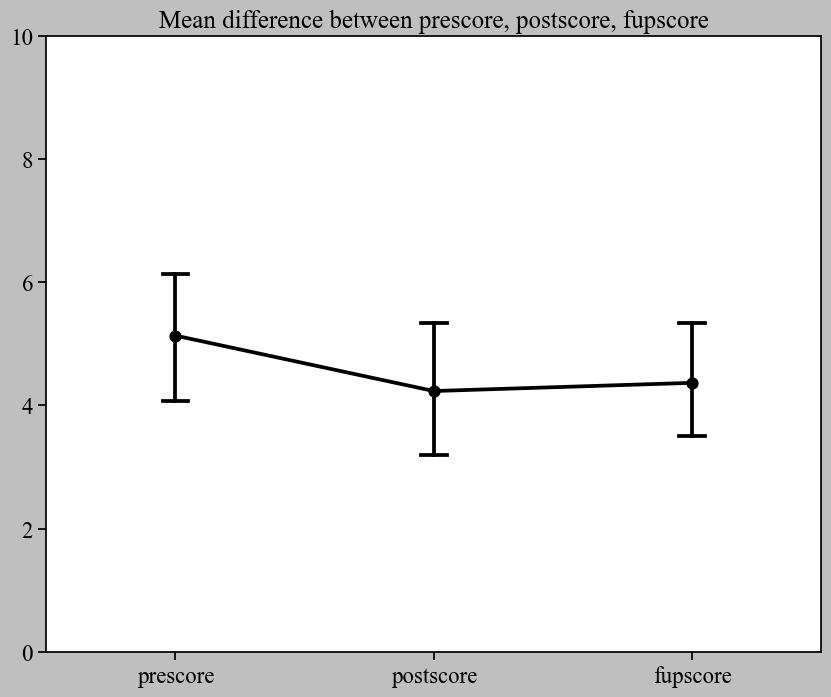

In [ ]:
sm.progress(method = 'f_oneway_rm', vars = ['prescore','postscore','fupscore'], posthoc = True).figure()

Dependent Samples T-test
변수 : prescore, postscore
n = 30
기술통계치: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


<Axes: title={'center': 'Mean difference between prescore, postscore'}>

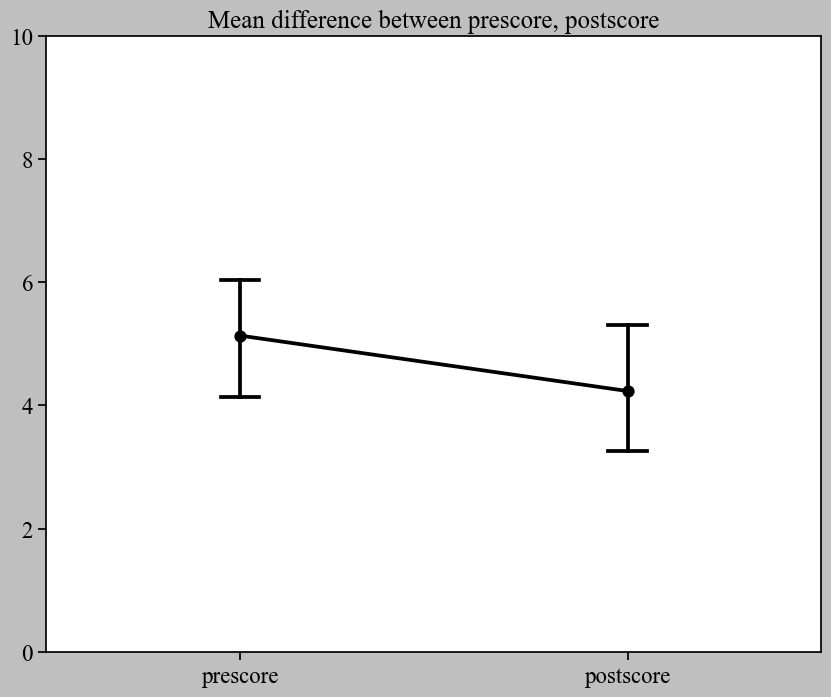

In [ ]:
sm.progress(method = 'ttest_rel', vars =['prescore', 'postscore']).figure()

Indenpendent Samples T-test
변수 : age
집단변수 : sex
비교집단 : ['female' 'male']
기술통계치: 


,female,male
n,15.000,15.000
mean,27.333,28.000
median,26.000,26.000
std,4.880,6.939
min,21.000,20.000
max,39.000,39.000


,t-value,degree of freedom,p-value,95% CI,Cohen'd
dependent variable,,,,,
age,-0.304,28.0,0.763,"[-5.153, 3.820]",-0.111


<Axes: title={'center': 'Mean differences in age by sex'}, xlabel='sex', ylabel='age'>

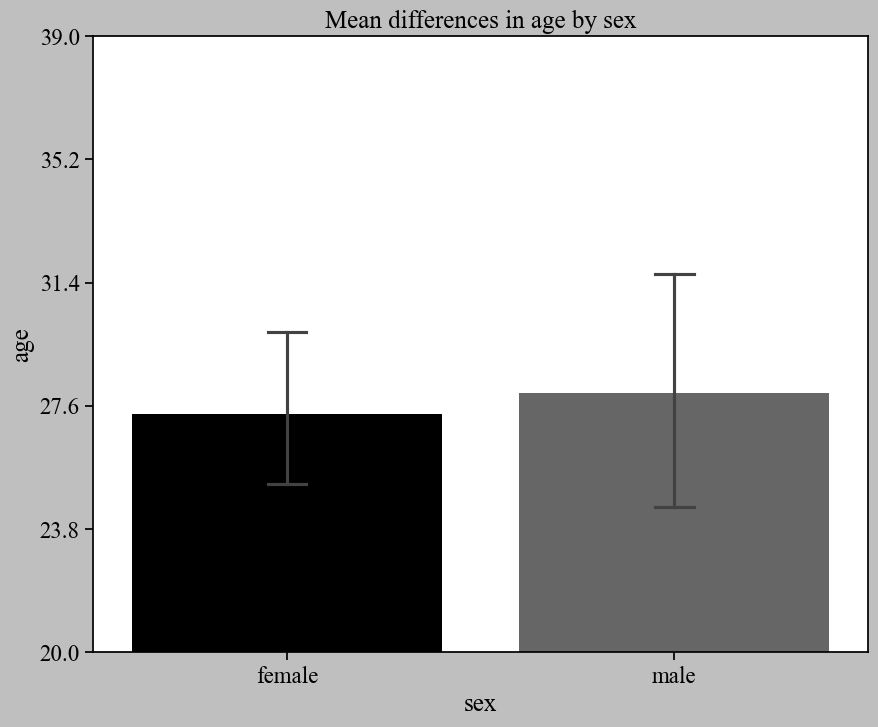

In [ ]:
sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex').figure()

In [ ]:
# df = pd.read_csv(r"C:\Users\ckdck\OneDrive - DYPHI\문서 - 기획\3. 데이터관리\3-3. 대외연구_데이터\3-3-6. 질병청_디지털노쇠_데이터\1차년도(2023)\rawdata\df_for_final_result_report_240102.csv", index_col = 'id')
# sm = Stat_Manager(df)

In [ ]:
sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'])

Dependent Samples T-test
변수 : prescore, postscore
n = 30
기술통계치: 



,prescore,postscore
n,30.000,30.000
mean,5.133,4.233
median,5.500,4.000
std,2.849,2.909
min,0.000,0.000
max,10.000,10.000


,t-value,degree of freedom,p-value,95% CI,Cohen's d
variables,,,,,
"['prescore', 'postscore']",1.198,29.0,0.24,"[-0.636, 2.436]",0.313


In [ ]:
sm.progress(method = 'linearr', vars = ['frailty_index', ['gait_speed', '30sts', 'step_daily', 'rpe_mean', 'subjective_health']])

In [ ]:
result = sm.progress(method = 'hier_linearr', vars = ['frailty_index', ['sex','age','height','weight','muscle', 'fat', 'sppb_total_score'], ['gait_speed', '30sts', 'step_daily', 'rpe_mean', 'subjective_health']])

In [ ]:
result.df_results[2].to_clipboard()